In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def int_simpson(f,a,b,N=100):
    assert N%2==0
    assert a<b
    assert callable(f)
    x_i=np.linspace(a,b,N+1)
    delta=(b-a)/N
    f_xi=f(x_i)
    f_xi[0] /=2; f_xi[-1]/=2
    area =delta*np.sum([
        (2*f_/3 if index[0]%2==0 else 4*f_/3)
            for index,f_ in np.ndenumerate(f_xi)
    ])
    return area

In [36]:
def func(y):
    global D1
    global D2
    global lam
    global z
    x = 0
    return np.exp((np.pi*1j*(x-y)**2)/(D1*lam))*np.exp((np.pi*1j*(z-y)**2)/(D2*lam))

def I1(D1,D2,lam,a,d,z): #solo la rendija de abajo
    A = np.exp((2*np.pi*1j*(D1+D2))/lam)*(int_simpson(func,-d-a/2,-d+a/2,N=1000))
    return A

def I2(D1,D2,lam,a,d,z): #solo la rendija de arriba
    A = np.exp((2*np.pi*1j*(D1+D2))/lam)*(int_simpson(func,d-a/2,d+a/2,N=1000))
    return A

def I3(D1,D2,lam,a,d,z): #Las dos
    A = np.exp((2*np.pi*1j*(D1+D2))/lam)*(int_simpson(func,-d-a/2,-d+a/2,N=1000) + int_simpson(func,d-a/2,d+a/2,N=1000))
    return A

In [78]:
D1 = .5
D2 = .5 
lam = 5.5e-7
d = 0.1
a = 0.0001
Z = np.linspace(-0.3,0.3,1000)
Int1 = [] #solo la de abajo
Int2 = [] #Solo la de arriba
Int3 = [] #las dos
for i in range(len(Z)):
    z = Z[i]
    Int1.append(abs(I1(D1,D2,lam,a,d,z)))
    Int2.append(abs(I2(D1,D2,lam,a,d,z)))
    Int3.append(abs(I3(D1,D2,lam,a,d,z)))
    
    
Int1 = np.array(Int1)
Int2 = np.array(Int2)
Int3 = np.array(Int3)

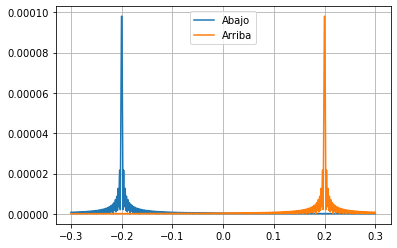

In [79]:
plt.plot(Z,Int1,label = 'Abajo')
plt.plot(Z,Int2,label = 'Arriba')
plt.legend()
plt.grid()

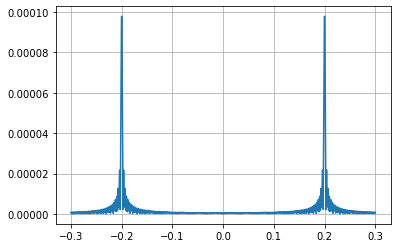

In [80]:
plt.plot(Z,Int3)
plt.grid()